In [14]:
pip install numpy pandas scikit-learn networkx matplotlib


In [15]:
import pandas as pd
import networkx as nx
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [16]:
url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'
df = pd.read_csv(url, sep=" ", header=None, names=["Node1", "Node2"])
G = nx.from_pandas_edgelist(df, "Node1", "Node2")
adj_matrix = nx.to_numpy_array(G)

In [17]:
n_clusters = 5
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
labels = sc.fit_predict(adj_matrix)
sil_score = silhouette_score(adj_matrix, labels, metric='euclidean')
print(f"Silhouette Score: {sil_score}")


Silhouette Score: -0.24169468479742137


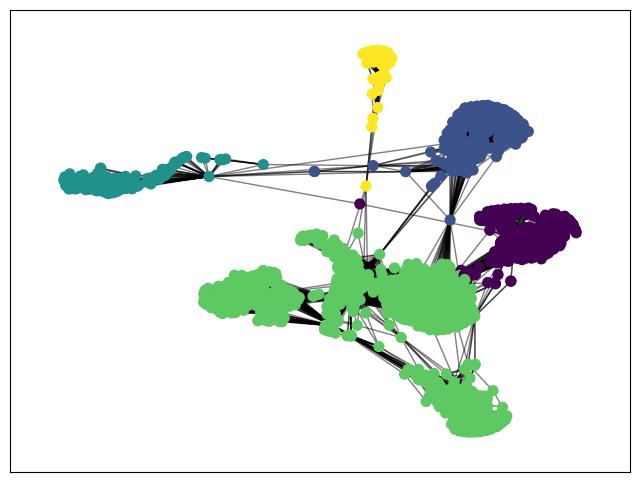

In [18]:
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color=labels, cmap=plt.cm.viridis, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [19]:
if sil_score > 0.5:
    print(f"The clustering is good with a silhouette score of {sil_score}.")
elif 0.2 <= sil_score <= 0.5:
    print(f"The clustering is moderate with a silhouette score of {sil_score}.")
else:
    print(f"The clustering is poor with a silhouette score of {sil_score}. Consider tuning parameters.")

# 4.2 Cluster Characteristics
import numpy as np
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("\nCluster Sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} nodes")

# 4.3 Insights and Patterns
largest_cluster = max(cluster_sizes, key=cluster_sizes.get)
smallest_cluster = min(cluster_sizes, key=cluster_sizes.get)

print(f"\nThe largest cluster is Cluster {largest_cluster} with {cluster_sizes[largest_cluster]} nodes.")
print(f"The smallest cluster is Cluster {smallest_cluster} with {cluster_sizes[smallest_cluster]} nodes.")

# 4.4 Analyzing Inter-cluster Connections
cluster_degrees = {}
for cluster in unique:
    cluster_nodes = [node for node, label in enumerate(labels) if label == cluster]
    cluster_subgraph = G.subgraph(cluster_nodes)
    avg_degree = sum(dict(cluster_subgraph.degree()).values()) / len(cluster_subgraph)
    cluster_degrees[cluster] = avg_degree

print("\nAverage Degree of Nodes in Each Cluster:")
for cluster, avg_deg in cluster_degrees.items():
    print(f"Cluster {cluster}: {avg_deg:.2f} average connections per node")


The clustering is poor with a silhouette score of -0.24169468479742137. Consider tuning parameters.

Cluster Sizes:
Cluster 0: 785 nodes
Cluster 1: 548 nodes
Cluster 2: 205 nodes
Cluster 3: 2441 nodes
Cluster 4: 60 nodes

The largest cluster is Cluster 3 with 2441 nodes.
The smallest cluster is Cluster 4 with 60 nodes.

Average Degree of Nodes in Each Cluster:
Cluster 0: 38.53 average connections per node
Cluster 1: 14.86 average connections per node
Cluster 2: 10.30 average connections per node
Cluster 3: 31.79 average connections per node
Cluster 4: 4.07 average connections per node


In [20]:
print("\nInterpretation of Clustering Results:")
if sil_score > 0.5:
    print("The clusters are well-defined and separate distinct communities within the network.")
elif 0.2 <= sil_score <= 0.5:
    print("The clusters overlap to some extent, suggesting communities that are not perfectly distinct.")
else:
    print("The clusters are poorly separated, indicating that the community structure is not clear.")

if largest_cluster > 0.6 * len(labels):
    print(f"Cluster {largest_cluster} dominates the network, suggesting one large connected community.")
if smallest_cluster < 0.05 * len(labels):
    print(f"Cluster {smallest_cluster} is very small, potentially an isolated or specialized group.")


Interpretation of Clustering Results:
The clusters are poorly separated, indicating that the community structure is not clear.
Cluster 4 is very small, potentially an isolated or specialized group.
